## 项目一 芝加哥工人薪水假设检验

In [18]:
# import numpy and pandas
import pandas as pd
import numpy as np

# 1. 数据读入与基本统计分析

我们有给定芝加哥雇员薪金数据，pandas是python例数据处理的常用库。第一步将数据导入dataframe 的数据结构中.

In [3]:
# Run this code:

salaries = pd.read_csv('./Current_Employee_Names__Salaries__and_Position_Titles.csv')

describe属性会对数据做基本统计

In [4]:
salaries.describe()


,Typical Hours,Annual Salary,Hourly Rate
count,8022.000000,25161.000000,8022.000000
mean,34.507604,86786.999790,32.788558
std,9.252077,21041.354602,12.112573
min,10.000000,7200.000000,2.650000
25%,20.000000,76266.000000,21.200000
50%,40.000000,90024.000000,35.600000
75%,40.000000,96060.000000,40.200000
max,40.000000,300000.000000,109.000000


# 2. 提取特定列元素
提取兼职（part time job）工人的数据，兼职工人是按小时付费的

In [9]:
part_workers=salaries[salaries["Full or Part-Time"]=="P"]
part_workers

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
26,"ABIOYE, ADEWOLE A",LIBRARY ASSOCIATE - HOURLY,PUBLIC LIBRARY,P,Hourly,20.0,NaN,25.10
90,"ACHA, SHARAZAN MARLENE",POOL MOTOR TRUCK DRIVER,STREETS & SAN,P,Hourly,10.0,NaN,28.48
95,"ACKLIN, QIANA D",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
122,"ADAMS, CHRISTINA",SENIOR COMPANION,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
137,"ADAMS, JAMES H",POOL MOTOR TRUCK DRIVER,STREETS & SAN,P,Hourly,10.0,NaN,28.48
147,"ADAMS, MARJORIE E",LIBRARY PAGE,PUBLIC LIBRARY,P,Hourly,20.0,NaN,13.15
157,"ADAMS, ROSITA",CROSSING GUARD - PER CBA,OEMC,P,Hourly,20.0,NaN,15.94


In [15]:
len(part_workers)

2093

# 3. 均值的假设检验 
>目标： 检测part time 的工人薪金是不是 $H_0: \mu =30美元/h$

###  3.1 计算part time job 工人的薪金均值与标准差

$$\hat{\mu}=\frac{1}{n}\sum_i x_i$$
$$\hat{\sigma^2}=\frac{1}{n-1}\sum_i (x_i-\hat{\mu})^2$$

In [12]:
mu=part_workers['Typical Hours'].mean()
sigma=part_workers["Typical Hours"].std()


In [13]:
mu

19.196556671449066

In [14]:
sigma*sigma

9.11493550623608

### 3.2 由于方差未知构造 $t$ 检验量
$$t = \frac{\mu - 15}{\frac{\hat{\sigma}}{\sqrt{n}}}$$

In [20]:
t=(mu-15)/(sigma/np.power(len(part_workers),0.5))
t

63.59176900799407

由于是双侧检验查表 $t_{0.025}(n-1)$，比较大小得出接受或拒绝假设

$t_{0.025}(2093)$<0.05,所以拒绝原假设

In [56]:
from scipy import stats
interval=stats.t.interval(0.95,2093,mu,sigma)
interval

(13.275815035239345, 25.117298307658785)

# 4. 均值差的假设检验

>目标：警察的平均年薪是否要比其他年薪收入者高
原假设$H_0 : u_{police}>u_{else}$， 与备择假设$H_0 : u_{police}\leq u_{else}$

### 4.1 提取所有年薪工人数据，分为是警察，不是警察两类

In [34]:
police_workers=salaries[salaries["Department"]=="POLICE"]
no_police=salaries[(salaries["Department"]!="POLICE") & (salaries["Annual Salary"].notna())]


In [22]:
police_workers

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006.0,NaN
14,"ABDELMAJEID, AZIZ",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
22,"ABEJERO, JASON V",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
25,"ABFALL, RICHARD C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN
27,"ABNEY, PATRICK",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
28,"ABOUASSI, CHADI",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN


In [35]:
no_police

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
5,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,50436.0,NaN
8,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,103350.0,NaN
13,"ABDELLATIF, AREF R",FIREFIGHTER (PER ARBITRATORS AWARD)-PARAMEDIC,FIRE,F,Salary,NaN,102228.0,NaN
15,"ABDOLLAHZADEH, ALI",FIREFIGHTER/PARAMEDIC,FIRE,F,Salary,NaN,91272.0,NaN
16,"ABDUL-KARIM, MUHAMMAD A",ENGINEERING TECHNICIAN VI,WATER MGMNT,F,Salary,NaN,111492.0,NaN
17,"ABDULLAH, DANIEL N",FIREFIGHTER-EMT,FIRE,F,Salary,NaN,95484.0,NaN
20,"ABDULSATTAR, MUDHAR",CIVIL ENGINEER II,WATER MGMNT,F,Salary,NaN,65448.0,NaN
23,"ABERCROMBIE IV, EARL S",PARAMEDIC I/C,FIRE,F,Salary,NaN,82614.0,NaN


### 4.2 分别计算两类的均值与标准差

$$\hat{\mu_p}=\frac{1}{n_p}\sum_i x_i$$
$$\hat{\sigma^2_p}=\frac{1}{n_p-1}\sum_i (x_i-\hat{\mu}_p)^2$$
$$\hat{\mu_e}=\frac{1}{n_e}\sum_j x_i$$
$$\hat{\sigma^2_e}=\frac{1}{n_e-1}\sum_j (x_i-\hat{\mu_e})^2$$

In [24]:
mu1=police_workers["Annual Salary"].mean()
sigma1=police_workers["Annual Salary"].std()

In [25]:
mu1 

86486.41450313339

In [27]:
sigma1

18272.228293992157

In [36]:
mu2=no_police["Annual Salary"].mean()
sigma2=no_police["Annual Salary"].std()

In [37]:
mu2

87129.69309517738

In [38]:
sigma2

23804.869574175384

###  4.3 构造t检验量 

$$t = \frac{\mu - 15}{\frac{\hat{\sigma}}{\sqrt{n}}}$$
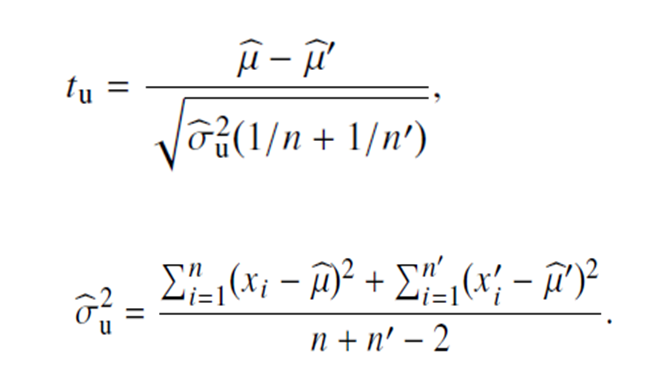

In [50]:
a=((police_workers["Annual Salary"]-mu1)**2).sum()
b=((no_police["Annual Salary"]-mu2)**2).sum()
c=len(police_workers["Annual Salary"])
d=len(no_police["Annual Salary"])
sigma_u2=(a+b)/(c+d-2)
sigma_u2

442477311.9641957

In [54]:
c+d-2

25169

In [51]:
t_u=(mu2-mu1)/np.power(sigma_u2*(1/c+1/d),0.5)
t_u

2.420643147642172

由于是单检验查表 $t_{0.05}(n_1+n_2-2)$，比较大小得出接受或拒绝假设

𝑡0.05(25169) <t_u,所以接受原假设，警察的平均年薪要比其他年薪收入者高。